# Airbnb Price Predicition

Drive Link: "https://drive.google.com/file/d/1gpuyni-9vzJb9E3CcAc0T2DCvs5GUu9v/view?usp=sharing"

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings

warnings.filterwarnings("ignore") #Ignore the warnings

In [2]:
df = pd.read_csv("Airbnb_data - airbnb_data.csv")
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [4]:
#Removing the unwanted columns
df.drop(['first_review','host_has_profile_pic','last_review','thumbnail_url','neighbourhood','description','host_since','host_has_profile_pic','bed_type'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   cancellation_policy     74111 non-null  object 
 8   cleaning_fee            74111 non-null  bool   
 9   city                    74111 non-null  object 
 10  host_identity_verified  73923 non-null  object 
 11  host_response_rate      74111 non-null  int64  
 12  instant_bookable        74111 non-null  object 
 13  latitude                74111 non-null  float64
 14  longitude               74111 non-null

In [5]:
print(round(df.describe(),2))  # Get a statistical summary

                id  log_price  accommodates  bathrooms  host_response_rate  \
count     74111.00   74111.00      74111.00   73911.00            74111.00   
mean   11266617.10       4.78          3.16       1.24               71.06   
std     6081734.89       0.72          2.15       0.58               43.09   
min         344.00       0.00          1.00       0.00                0.00   
25%     6261964.50       4.32          2.00       1.00                0.00   
50%    12254147.00       4.71          2.00       1.00              100.00   
75%    16402260.50       5.22          4.00       1.00              100.00   
max    21230903.00       7.60         16.00       8.00              100.00   

       latitude  longitude  number_of_reviews  review_scores_rating  bedrooms  \
count  74111.00   74111.00           74111.00              57389.00  74020.00   
mean      38.45     -92.40              20.90                 94.07      1.27   
std        3.08      21.71              37.83         

In [6]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
cancellation_policy           0
cleaning_fee                  0
city                          0
host_identity_verified      188
host_response_rate            0
instant_bookable              0
latitude                      0
longitude                     0
name                          0
number_of_reviews             0
review_scores_rating      16722
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64


In [7]:
df.loc[df['number_of_reviews'] == 0, 'review_scores_rating'] = 0
df['review_scores_rating'].fillna(df['review_scores_rating'].median(), inplace=True)

In [8]:
# Fill missing numerical values with median
num_cols = ['bathrooms', 'bedrooms', 'beds']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [9]:
#Verifying the filling of null values
df.isnull().sum()

id                          0
log_price                   0
property_type               0
room_type                   0
amenities                   0
accommodates                0
bathrooms                   0
cancellation_policy         0
cleaning_fee                0
city                        0
host_identity_verified    188
host_response_rate          0
instant_bookable            0
latitude                    0
longitude                   0
name                        0
number_of_reviews           0
review_scores_rating        0
zipcode                   968
bedrooms                    0
beds                        0
dtype: int64

In [10]:
cat_cols = ['host_identity_verified', 'zipcode']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Fill with most frequent category

In [11]:
#Feature Engineering

# Convert the 'amenities' column into a feature representing count of amenities
df['num_amenities'] = df['amenities'].apply(lambda x: len(x.split(',')))
df.drop(columns=['amenities'], inplace=True)  # Drop original text column

print("Amenities feature created!")

Amenities feature created!


In [12]:
# Create review score bins
df['review_scores_category'] = pd.cut(df['review_scores_rating'], bins=[0, 60, 80, 100], labels=['Low', 'Medium', 'High'])

# Convert to numeric
df['review_scores_category'] = df['review_scores_category'].astype('category').cat.codes

In [13]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
cancellation_policy        object
cleaning_fee                 bool
city                       object
host_identity_verified     object
host_response_rate          int64
instant_bookable           object
latitude                  float64
longitude                 float64
name                       object
number_of_reviews           int64
review_scores_rating      float64
zipcode                    object
bedrooms                  float64
beds                      float64
num_amenities               int64
review_scores_category       int8
dtype: object

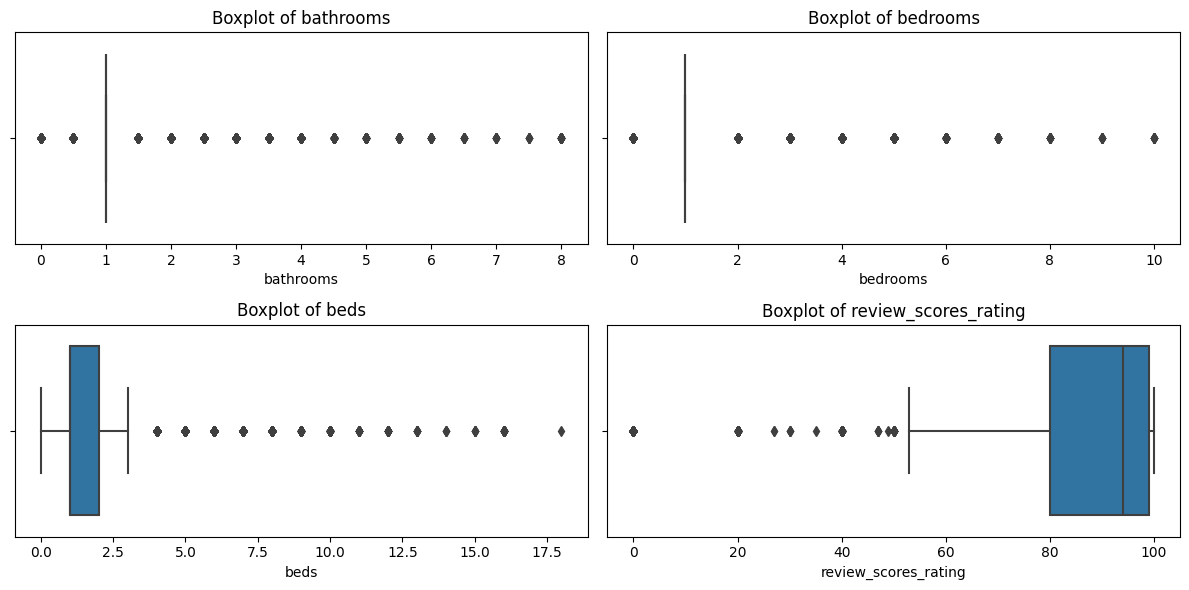

In [14]:
# List of numerical columns to check
num_cols = ['bathrooms', 'bedrooms', 'beds', 'review_scores_rating']

# Convert columns to numeric (if they are not)
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, set errors as NaN

# Drop NaN values for better visualization
df_cleaned = df[num_cols].dropna()

# Plot boxplots for each column
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_cleaned[col])  # Use cleaned dataframe
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [15]:
#Using Winsorization(Capping outliers instead of removing them to avoid data loss)

from scipy.stats.mstats import winsorize

def cap_outliers(df, col, lower_percentile=0.01, upper_percentile=0.99):
    lower = df[col].quantile(lower_percentile)
    upper = df[col].quantile(upper_percentile)
    df[col] = np.clip(df[col], lower, upper)  # Cap values within range

# Apply winsorization to numerical columns
num_cols = ['bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
for col in num_cols:
    cap_outliers(df, col)

print("Outliers capped instead of removed. Data shape:", df.shape)

Outliers capped instead of removed. Data shape: (74111, 22)


In [16]:
# Apply One-Hot Encoding to categorical columns
categorical_cols = ['property_type', 'room_type', 'cancellation_policy', 'city', 'instant_bookable']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Categorical features encoded successfully!")
print("New Data Shape:", df.shape)

Categorical features encoded successfully!
New Data Shape: (74111, 63)


In [17]:
#Label Encoding

df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})  # Convert 't' to 1, 'f' to 0

In [18]:
print("Number of unique zipcodes:", df['zipcode'].nunique())

# Convert zipcode to numerical encoding to check correlation
df['zipcode_num'] = df['zipcode'].astype('category').cat.codes

# Check correlation with log_price
print(df[['zipcode_num', 'log_price']].corr())

Number of unique zipcodes: 668
             zipcode_num  log_price
zipcode_num     1.000000   0.042524
log_price       0.042524   1.000000


In [19]:
#Low correlation between zipcodes and log_price.
#Therfore, dropping zipcodes column

df.drop(['zipcode'],axis=1, inplace=True)

In [20]:
# Define target variable
y = df['log_price']

# Drop irrelevant columns (ID, name, log_price itself)
X = df.drop(columns=['id', 'name', 'log_price'])

print("Features and target variable defined!")
print("X shape:", X.shape)
print("y shape:", y.shape)

Features and target variable defined!
X shape: (74111, 60)
y shape: (74111,)


In [21]:
from sklearn.model_selection import train_test_split

# Split data: 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train-Test split completed!")
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Train-Test split completed!
Training set: (59288, 60), Testing set: (14823, 60)


In [22]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns to scale
scale_cols = ['bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'num_amenities', 'latitude', 'longitude']

# Applying StandardScaler
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

print("Scaling applied!")

Scaling applied!


In [23]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
lr_model = LinearRegression()

# Train (fit) the model on training data
lr_model.fit(X_train, y_train)

print("Baseline Linear Regression model trained successfully!")

Baseline Linear Regression model trained successfully!


In [24]:
# Predict on test set
y_pred = lr_model.predict(X_test)

print("Predictions completed!")

Predictions completed!


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"📊 Model Performance Metrics:")
print(f"✅ Mean Absolute Error (MAE): {mae:.4f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"✅ R² Score: {r2:.4f}")

📊 Model Performance Metrics:
✅ Mean Absolute Error (MAE): 0.3431
✅ Root Mean Squared Error (RMSE): 0.4560
✅ R² Score: 0.5952


In [26]:
#Trying Random Forest for better performance

from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)

# Train (fit) the model on training data
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully! ")

Random Forest model trained successfully! 


In [27]:
# Predict on test set
y_pred_rf = rf_model.predict(X_test)

print("Predictions completed!")

Predictions completed!


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print(f" Random Forest Model Performance:")
print(f" Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f" Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f" R² Score: {r2_rf:.4f}")

 Random Forest Model Performance:
 Mean Absolute Error (MAE): 0.2831
 Root Mean Squared Error (RMSE): 0.3924
 R² Score: 0.7002


In [29]:
# Get feature names & coefficients
coefficients = lr_model.coef_
feature_names = X_train.columns

# Create DataFrame
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Separate positive & negative impact features
positive_impact = coef_df[coef_df['Coefficient'] > 0].sort_values(by='Coefficient', ascending=False)
negative_impact = coef_df[coef_df['Coefficient'] < 0].sort_values(by='Coefficient')

# Display sorted influential factors
print("🔹 Positive Influencing Factors:")
print(positive_impact)
print("\n🔹 Negative Influencing Factors:")
print(negative_impact)

🔹 Positive Influencing Factors:
                                Feature   Coefficient
36          property_type_Parking Space  1.048613e+00
32                 property_type_Island  9.690157e-01
52  cancellation_policy_super_strict_60  5.756593e-01
39              property_type_Timeshare  5.061443e-01
40                   property_type_Tipi  4.944029e-01
25            property_type_Earth House  4.553659e-01
42                  property_type_Train  3.965906e-01
15         property_type_Boutique hotel  3.860397e-01
45                  property_type_Villa  3.587970e-01
21                   property_type_Cave  3.510909e-01
14                   property_type_Boat  3.334284e-01
51  cancellation_policy_super_strict_30  3.311638e-01
20                 property_type_Castle  3.236187e-01
37     property_type_Serviced apartment  2.721716e-01
44          property_type_Vacation home  2.333635e-01
19        property_type_Casa particular  2.087182e-01
22                 property_type_Chalet  1.990953e

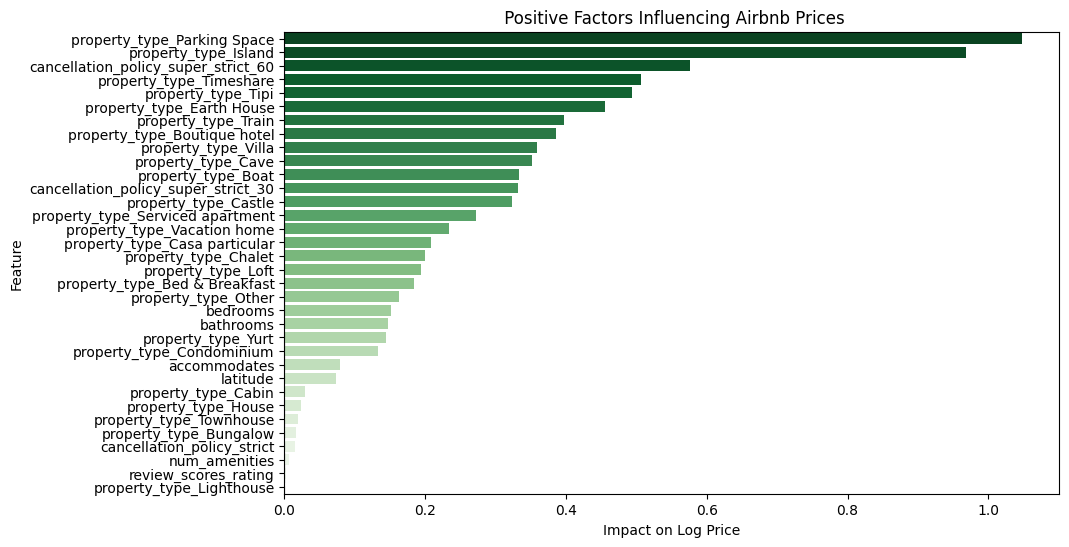

In [30]:
#Visualizing Positive Factors 

plt.figure(figsize=(10, 6))
sns.barplot(x=positive_impact['Coefficient'], y=positive_impact['Feature'], palette='Greens_r')
plt.title(" Positive Factors Influencing Airbnb Prices")
plt.xlabel("Impact on Log Price")
plt.ylabel("Feature")
plt.axvline(x=0, color='black', linestyle='dashed')  # Reference line at 0
plt.show()

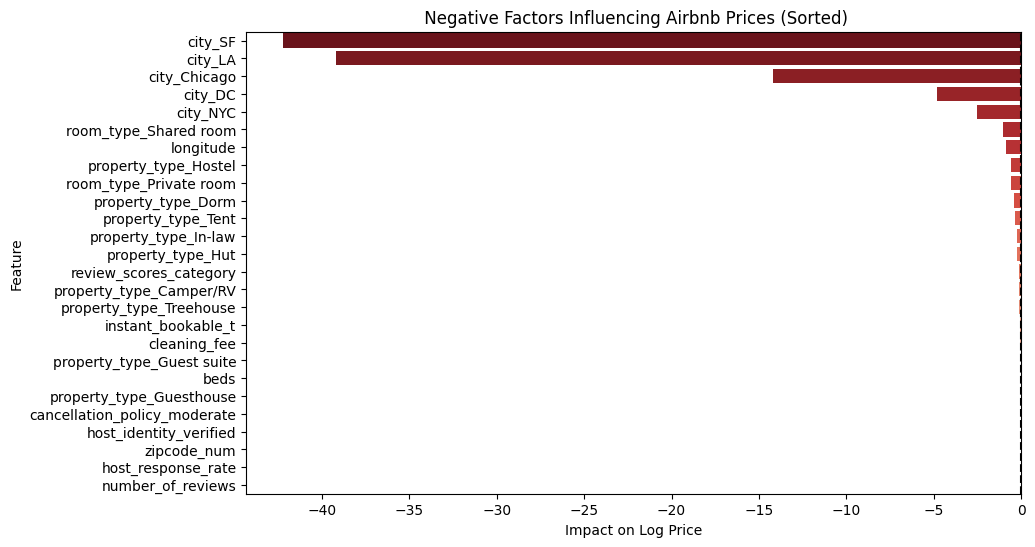

In [31]:
#Visualizing Negative Factors

plt.figure(figsize=(10, 6))
sns.barplot(x=negative_impact['Coefficient'], y=negative_impact['Feature'], palette='Reds_r')
plt.title(" Negative Factors Influencing Airbnb Prices (Sorted)")
plt.xlabel("Impact on Log Price")
plt.ylabel("Feature")
plt.axvline(x=0, color='black', linestyle='dashed')  # Reference line at 0
plt.show()

In [1]:
#Metric	 Linear Regression	Random Forest

#MAE	     0.3431	           0.2831
#RMSE	     0.4561	           0.3925
#R²-Score	 0.5951	           0.7002	  

In [2]:
#Factors That Increase Airbnb Prices (Maximize These!)

#1 More Bathrooms, Bedrooms, and Beds → Higher Price
#Listings with more bathrooms, bedrooms, and beds charge higher prices.

#2 Higher Review Ratings = Higher Prices
#Listings with higher review scores command better pricing.

#3 Instant Bookable Listings Charge More
#Hosts who enable Instant Book tend to price their listings higher.
#If you are comfortable with automatic bookings, enable "Instant Book" to attract higher-paying guests.

#4 Verified Hosts Can Charge More
#Hosts with identity verification typically list at higher prices.
#Verify your Airbnb host profile and encourage guests to leave reviews mentioning reliability.

In [3]:
#Factors That Reduce Airbnb Prices (Avoid These!)

#1 Private & Shared Rooms Are Significantly Cheaper
#Listings categorized as "Private Room" or "Shared Room" have much lower prices than Entire Homes.
#If possible, list your property as an "Entire Home" to increase nightly rates.

#2 Too Many Reviews Can Be a Sign of an Older Listing with Lower Pricing
#Listings with very high review counts tend to have slightly lower prices.
#If your listing has many reviews, refresh the listing with updated photos & descriptions to justify a higher price.

#3 Strict Cancellation Policies Might Discourage Higher Pricing
#Some cancellation policies may discourage bookings, forcing hosts to keep their prices lower.
#If you currently have a strict cancellation policy, consider offering a flexible or moderate cancellation policy to attract more guests.

In [4]:
#How Can Hosts Use These Insights to Maximize Revenue?

#Action Plan for Hosts to Optimize Pricing:
#1 Highlight more amenities, especially bathrooms, bedrooms, and beds.
#2 Improve guest experience to increase review scores → Justifies higher pricing.
#3 Enable Instant Book → Attracts higher-paying guests.
#4 Verify your host profile → Builds trust and increases booking value.
#5 List as an "Entire Home" instead of a "Private Room" whenever possible.
#6 Update your listing periodically to refresh pricing strategies.